In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
from sklearn.datasets import load_files
import re
from unidecode import unidecode
from mpl_toolkits import mplot3d
from yellowbrick.cluster import KElbowVisualizer
print("Importado1")


nltk.download('rslp')
nltk.download('stopwords')


Importado1


[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\caios\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\caios\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
caminho_arquivo_1= 'cod_material_servico.txt'
df= pd.read_csv(caminho_arquivo_1,sep=";" )

df.head(10)

,cod_item,desc,status,cod_grupo,grupo,cod_classe,classe,cod_classif,classif,material_servico,complex
0,449284,"PECAS / ACESSORIOS ARMAMENTO, MATERIAL ACO TI...",ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
1,447288,"PECAS / ACESSORIOS ARMAMENTO, MATERIAL ACO TI...",ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
2,236330,"BUCHA PLACA PUNHO, MATERIAL ACO COM ROSCA INTE...",ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,15001.0,BUCHA PLACA PUNHO,MATERIAL,1.0
3,451952,"PECAS / ACESSORIOS ARMAMENTO, MATERIAL METAL ...",ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
4,448489,"PECAS / ACESSORIOS ARMAMENTO, MATERIAL ACO TI...",ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0


In [5]:
df["desc"] = df["desc"].apply(lambda x: x.lower()) #converte todas as letras para minúsculo 
df["desc"] = df["desc"].apply(lambda x: re.sub('|,|\.|/|$|\(|\)|-|\+|:|•', '', x)) #remove números e caracteres especiais 
df["desc"] = df["desc"].apply(lambda x: unidecode(x)) #remove acentos 

stemmer = nltk.stem.RSLPStemmer() #converte as palavras para seu radical 
df["desc"] = df["desc"].apply(lambda x: stemmer.stem(x))
df.head()

,cod_item,desc,status,cod_grupo,grupo,cod_classe,classe,cod_classif,classif,material_servico,complex
0,449284,pecas acessorios armamento material aco tipo...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
1,447288,pecas acessorios armamento material aco tipo...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
2,236330,bucha placa punho material aco com rosca inter...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,15001.0,BUCHA PLACA PUNHO,MATERIAL,1.0
3,451952,pecas acessorios armamento material metal ti...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
4,448489,pecas acessorios armamento material aco tipo...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0


In [7]:
# Importancia Relativa das Palavras, testar sem esse passo depois
#stopwords = nltk.corpus.stopwords.words('portuguese')
#stopwords.extend(["nao"])
#----------------------------------------------------
#vec = TfidfVectorizer(stop_words=stopwords)
#vec.fit(df.dsc_item.values)
#features = vec.transform(df.dsc_item.values)

# tirando a questao de stopwords
vec = TfidfVectorizer()
vec.fit(df.desc.values)
features = vec.transform(df.desc.values)

In [8]:
wcss = []
for cluster in range(2,250):
    cls = MiniBatchKMeans(n_clusters=cluster, random_state=42)
    cls.fit(features)
    silhouette_avg = v_measure_score(df.desc.values, cls.labels_)
    print("For n_clusters =", cluster,"The average silhouette_score is :", silhouette_avg)
    wcss.append(cls.inertia_)

C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.09575516522952293


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.1261258397493161


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.16993172786502603


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.18083051599243302


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.19647997548658994


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.2064819648523406


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.2114960385917835


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.22436000681475393


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.23518870997597227


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11 The average silhouette_score is : 0.26481959426629187


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12 The average silhouette_score is : 0.2867548133760748


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13 The average silhouette_score is : 0.2968447758096531


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 14 The average silhouette_score is : 0.3002606573626537


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 15 The average silhouette_score is : 0.3111296829449974


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 16 The average silhouette_score is : 0.3171732954164477


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 17 The average silhouette_score is : 0.31789470619329296


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 18 The average silhouette_score is : 0.32335046882840845


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 19 The average silhouette_score is : 0.3224198055943332


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 20 The average silhouette_score is : 0.328342728504085


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 21 The average silhouette_score is : 0.32064635043156137


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 22 The average silhouette_score is : 0.32004360623798245


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 23 The average silhouette_score is : 0.3360715929010872


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 24 The average silhouette_score is : 0.3470921103167421


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 25 The average silhouette_score is : 0.3558792459306277


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 26 The average silhouette_score is : 0.35619461736114477


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 27 The average silhouette_score is : 0.36238614817251674


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 28 The average silhouette_score is : 0.3520792546013588


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 29 The average silhouette_score is : 0.3597413021622139


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 30 The average silhouette_score is : 0.35805019270288113


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 31 The average silhouette_score is : 0.3730738494272491


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 32 The average silhouette_score is : 0.37837080904964737


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 33 The average silhouette_score is : 0.3825916086187108


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 34 The average silhouette_score is : 0.364913847047513


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 35 The average silhouette_score is : 0.3764642295307529


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 36 The average silhouette_score is : 0.3744259201948723


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 37 The average silhouette_score is : 0.3976669736801014


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 38 The average silhouette_score is : 0.38328414087776785


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 39 The average silhouette_score is : 0.3917242974526776


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 40 The average silhouette_score is : 0.3971780833975094


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 41 The average silhouette_score is : 0.36851278582408625


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 42 The average silhouette_score is : 0.3789526352390799


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 43 The average silhouette_score is : 0.3902931637091878


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 44 The average silhouette_score is : 0.4115949935915341


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 45 The average silhouette_score is : 0.40237006486080745


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 46 The average silhouette_score is : 0.39389154252929204


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 47 The average silhouette_score is : 0.396892253055704


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 48 The average silhouette_score is : 0.3987080970315394


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 49 The average silhouette_score is : 0.4174955662639441


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 50 The average silhouette_score is : 0.40071612340817464


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 51 The average silhouette_score is : 0.42570420876985554


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 52 The average silhouette_score is : 0.4078702724324089


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 53 The average silhouette_score is : 0.41472963035967075


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 54 The average silhouette_score is : 0.4267890165758672


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 55 The average silhouette_score is : 0.4151244995803817


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 56 The average silhouette_score is : 0.42029720429361167


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 57 The average silhouette_score is : 0.42062715297628706


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 58 The average silhouette_score is : 0.4222843529928591


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 59 The average silhouette_score is : 0.42894354724730593


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 60 The average silhouette_score is : 0.4174258803491534


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 61 The average silhouette_score is : 0.43098739615925374


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 62 The average silhouette_score is : 0.41836115337160285


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 63 The average silhouette_score is : 0.43571228919981747


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 64 The average silhouette_score is : 0.4349352059738027


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 65 The average silhouette_score is : 0.4297836402002636


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 66 The average silhouette_score is : 0.4344695030191967


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 67 The average silhouette_score is : 0.44059950224462224


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 68 The average silhouette_score is : 0.4296091054647814


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 69 The average silhouette_score is : 0.4249230341530833


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 70 The average silhouette_score is : 0.43551282227689014


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 71 The average silhouette_score is : 0.44952477390979056


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 72 The average silhouette_score is : 0.4446136548492086


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 73 The average silhouette_score is : 0.43103029861634645


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 74 The average silhouette_score is : 0.4395148249158715


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 75 The average silhouette_score is : 0.434272993589507


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 76 The average silhouette_score is : 0.45162566792473235


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 77 The average silhouette_score is : 0.42010073576398954


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 78 The average silhouette_score is : 0.43422821920409793


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 79 The average silhouette_score is : 0.44388976324471086


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 80 The average silhouette_score is : 0.4333246684520972


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 81 The average silhouette_score is : 0.445340477340121


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 82 The average silhouette_score is : 0.4486932324728454


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 83 The average silhouette_score is : 0.4160761444333451


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 84 The average silhouette_score is : 0.4396902589635639


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 85 The average silhouette_score is : 0.440572832201777


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 86 The average silhouette_score is : 0.4423486533792218


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 87 The average silhouette_score is : 0.4414640358765365


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 88 The average silhouette_score is : 0.43725430997059156


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 89 The average silhouette_score is : 0.43136526017012117


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 90 The average silhouette_score is : 0.4401216818726462


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 91 The average silhouette_score is : 0.4505580792922431


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 92 The average silhouette_score is : 0.43918039221506233


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 93 The average silhouette_score is : 0.44966060810399455


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 94 The average silhouette_score is : 0.4288977145858549


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 95 The average silhouette_score is : 0.4623552526104421


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 96 The average silhouette_score is : 0.4435869003306939


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 97 The average silhouette_score is : 0.4520068082416068


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 98 The average silhouette_score is : 0.44027774314421275


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 99 The average silhouette_score is : 0.44886307453477875


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 100 The average silhouette_score is : 0.4348444883912128


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 101 The average silhouette_score is : 0.4503206814985407


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 102 The average silhouette_score is : 0.42292538761395493


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 103 The average silhouette_score is : 0.4560138785890228


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 104 The average silhouette_score is : 0.46097158232458546


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 105 The average silhouette_score is : 0.4373387514412707


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 106 The average silhouette_score is : 0.4485938776170739


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 107 The average silhouette_score is : 0.449636914394094


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 108 The average silhouette_score is : 0.4515139084918337


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 109 The average silhouette_score is : 0.4653629898165296


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 110 The average silhouette_score is : 0.4667385544584123


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 111 The average silhouette_score is : 0.46565632316191746


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 112 The average silhouette_score is : 0.4762599136891968


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 113 The average silhouette_score is : 0.4623336427961451


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 114 The average silhouette_score is : 0.46475997700876315


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 115 The average silhouette_score is : 0.4621473161795195


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 116 The average silhouette_score is : 0.4351891534770815


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 117 The average silhouette_score is : 0.4831171707555713


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 118 The average silhouette_score is : 0.4655823713603037


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 119 The average silhouette_score is : 0.4678592930188411


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 120 The average silhouette_score is : 0.46820373717101216


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 121 The average silhouette_score is : 0.4586593931031047


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 122 The average silhouette_score is : 0.4701139554969757


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 123 The average silhouette_score is : 0.46811973244537747


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 124 The average silhouette_score is : 0.46266402989018024


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 125 The average silhouette_score is : 0.4672628090871731


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 126 The average silhouette_score is : 0.46338673288572385


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 127 The average silhouette_score is : 0.46327828758416273


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 128 The average silhouette_score is : 0.45366667282352985


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 129 The average silhouette_score is : 0.45869455078136656


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 130 The average silhouette_score is : 0.47906884054505905


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 131 The average silhouette_score is : 0.45317029208505


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 132 The average silhouette_score is : 0.458194181414091


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 133 The average silhouette_score is : 0.4747403736478051


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 134 The average silhouette_score is : 0.45939476686297853


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 135 The average silhouette_score is : 0.46783122615415645


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 136 The average silhouette_score is : 0.4735507666346385


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 137 The average silhouette_score is : 0.46557759441682384


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 138 The average silhouette_score is : 0.472632788451917


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 139 The average silhouette_score is : 0.42938588122402216


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 140 The average silhouette_score is : 0.45478577662129355


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 141 The average silhouette_score is : 0.4609374846364608


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 142 The average silhouette_score is : 0.44880403816113


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 143 The average silhouette_score is : 0.4684836331230609


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 144 The average silhouette_score is : 0.45474532221810515


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 145 The average silhouette_score is : 0.43775937765760925


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 146 The average silhouette_score is : 0.44300288698870255


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 147 The average silhouette_score is : 0.44434757176530015


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 148 The average silhouette_score is : 0.4677302051637932


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 149 The average silhouette_score is : 0.4695858794054216


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 150 The average silhouette_score is : 0.47516615138956436


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 151 The average silhouette_score is : 0.4646109167037552


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 152 The average silhouette_score is : 0.4480668041946452


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 153 The average silhouette_score is : 0.4657869972360907


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 154 The average silhouette_score is : 0.4632459774677513


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 155 The average silhouette_score is : 0.4518733281198175


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 156 The average silhouette_score is : 0.4512623017580974


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 157 The average silhouette_score is : 0.4556357297824875


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 158 The average silhouette_score is : 0.4554105981211653


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 159 The average silhouette_score is : 0.45316272967037047


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 160 The average silhouette_score is : 0.44795434437849535


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 161 The average silhouette_score is : 0.44511431786343725


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 162 The average silhouette_score is : 0.4546168770478355


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 163 The average silhouette_score is : 0.4586526637732177


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 164 The average silhouette_score is : 0.45109819253608663


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 165 The average silhouette_score is : 0.4455660706835252


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 166 The average silhouette_score is : 0.4656231815821917


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 167 The average silhouette_score is : 0.4539684711128228


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 168 The average silhouette_score is : 0.4609649352084809


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 169 The average silhouette_score is : 0.44391553424437175


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 170 The average silhouette_score is : 0.46758966158740844


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 171 The average silhouette_score is : 0.4605406188147562


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 172 The average silhouette_score is : 0.46149188087897036


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 173 The average silhouette_score is : 0.45844194263335963


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 174 The average silhouette_score is : 0.4576814849102269


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 175 The average silhouette_score is : 0.45535534683420364


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 176 The average silhouette_score is : 0.43427804231022765


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 177 The average silhouette_score is : 0.44552680095925595


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 178 The average silhouette_score is : 0.4582332823703929


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 179 The average silhouette_score is : 0.4504651988684703


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 180 The average silhouette_score is : 0.4538283934569872


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 181 The average silhouette_score is : 0.4566941702638873


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 182 The average silhouette_score is : 0.4560577000851906


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 183 The average silhouette_score is : 0.423052085061089


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 184 The average silhouette_score is : 0.4767108076048487


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 185 The average silhouette_score is : 0.45255903990809443


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 186 The average silhouette_score is : 0.4554913290675878


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 187 The average silhouette_score is : 0.4542856118761364


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 188 The average silhouette_score is : 0.45756587998496456


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 189 The average silhouette_score is : 0.4611125931679727


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 190 The average silhouette_score is : 0.45661201771106064


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 191 The average silhouette_score is : 0.4449266234141873


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 192 The average silhouette_score is : 0.4637752130613554


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 193 The average silhouette_score is : 0.4556876871990225


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 194 The average silhouette_score is : 0.458767158185018


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 195 The average silhouette_score is : 0.47430963599708537


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 196 The average silhouette_score is : 0.4764276524853564


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 197 The average silhouette_score is : 0.47188358696866156


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 198 The average silhouette_score is : 0.43660933515661904


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 199 The average silhouette_score is : 0.4690152405262258


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 200 The average silhouette_score is : 0.4734711266682738


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 201 The average silhouette_score is : 0.44456540421999863


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 202 The average silhouette_score is : 0.42368212955798074


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 203 The average silhouette_score is : 0.4693901349164972


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 204 The average silhouette_score is : 0.4603344310879259


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 205 The average silhouette_score is : 0.44195646696226876


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 206 The average silhouette_score is : 0.45344229055670704


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 207 The average silhouette_score is : 0.46237445305978103


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 208 The average silhouette_score is : 0.4537708911907964


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 209 The average silhouette_score is : 0.41033042489448107


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 210 The average silhouette_score is : 0.4083703058186751


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 211 The average silhouette_score is : 0.47438379808762576


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 212 The average silhouette_score is : 0.459535954304769


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 213 The average silhouette_score is : 0.45056483440863787


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 214 The average silhouette_score is : 0.45235864282042265


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 215 The average silhouette_score is : 0.44477999701210136


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 216 The average silhouette_score is : 0.4484234924387875


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 217 The average silhouette_score is : 0.4453350950878235


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 218 The average silhouette_score is : 0.44192948358991874


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 219 The average silhouette_score is : 0.46628156717127517


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 220 The average silhouette_score is : 0.4376672573992688


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 221 The average silhouette_score is : 0.43459602412102294


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 222 The average silhouette_score is : 0.4261746497491685


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 223 The average silhouette_score is : 0.44877972190480603


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 224 The average silhouette_score is : 0.4266405827021561


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 225 The average silhouette_score is : 0.45052515480484046


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 226 The average silhouette_score is : 0.45328169816883995


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 227 The average silhouette_score is : 0.43368848408336796


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 228 The average silhouette_score is : 0.4521051430937881


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 229 The average silhouette_score is : 0.4602827725521538


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 230 The average silhouette_score is : 0.4377583874254674


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 231 The average silhouette_score is : 0.4572109959290453


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 232 The average silhouette_score is : 0.4064813989813683


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 233 The average silhouette_score is : 0.45950599950114246


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 234 The average silhouette_score is : 0.4603363901192879


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 235 The average silhouette_score is : 0.40092132962245536


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 236 The average silhouette_score is : 0.38462227584775777


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 237 The average silhouette_score is : 0.3961069977922202


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 238 The average silhouette_score is : 0.458892560099935


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 239 The average silhouette_score is : 0.4872469368115894


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 240 The average silhouette_score is : 0.466327258445802


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 241 The average silhouette_score is : 0.47357431511322745


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 242 The average silhouette_score is : 0.4501108377473147


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 243 The average silhouette_score is : 0.45525861004993856


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 244 The average silhouette_score is : 0.43095086297835483


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 245 The average silhouette_score is : 0.455441513001976


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 246 The average silhouette_score is : 0.4652422849761388


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 247 The average silhouette_score is : 0.41781330096345093


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 248 The average silhouette_score is : 0.4505854679164364


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 249 The average silhouette_score is : 0.4674122272352071


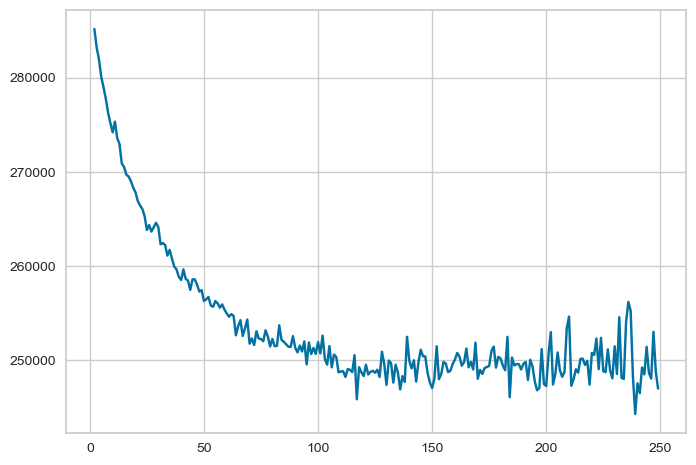

In [9]:
clusters = [i for i in range(2,250)]
plt.plot(clusters, wcss)

In [11]:
# Suponha que cls seja o seu modelo MiniBatchKMeans já treinado
cluster_to_print = 5  # O número do cluster que você deseja imprimir

# Encontre os índices dos pontos de dados que pertencem ao cluster escolhido
cluster_indices = [i for i, label in enumerate(cls.labels_) if label == cluster_to_print]

# Imprima os dados pertencentes ao cluster escolhido
for index in cluster_indices:
    print(features[index])


  (0, 112051)	0.05091937126902114
  (0, 110686)	0.16664988664588654
  (0, 106558)	0.2415562758485397
  (0, 101390)	0.2097264837389894
  (0, 93190)	0.24497830270238302
  (0, 90202)	0.16664342561812534
  (0, 90194)	0.2539234678714362
  (0, 86618)	0.2371595285184623
  (0, 83911)	0.05310724154629917
  (0, 74931)	0.27262233775685574
  (0, 73389)	0.2522395670378201
  (0, 73147)	0.16011180404469677
  (0, 60072)	0.21515375241245302
  (0, 59359)	0.10133422664787205
  (0, 55378)	0.1856548101624249
  (0, 54057)	0.1609287425017132
  (0, 48623)	0.0677106160301308
  (0, 43847)	0.18833504282908445
  (0, 34392)	0.06695694374207668
  (0, 33896)	0.09509913325582227
  (0, 17263)	0.28657078695287774
  (0, 13771)	0.34959745280197313
  (0, 8314)	0.16185868453421337
  (0, 7846)	0.302230823041568
  (0, 112051)	0.04883050052763285
  (0, 110686)	0.15981339075847453
  (0, 106558)	0.23164688725155766
  (0, 101390)	0.20112285206290165
  (0, 93190)	0.23492853193662924
  (0, 90202)	0.15980719478213706
  (0, 90194)	0

MemoryError: Unable to allocate 260. GiB for an array with shape (292908, 119168) and data type float64

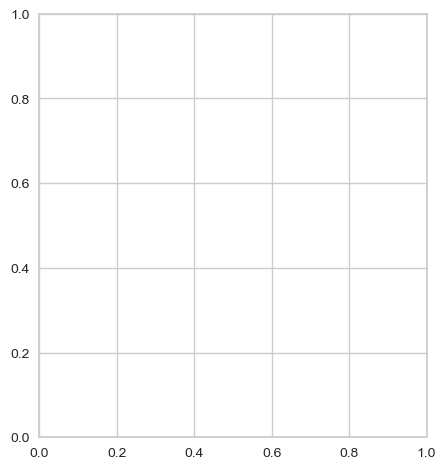

In [12]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1)
#Visualização gráfica 2D
# Converte as features para 2D
pca = PCA(n_components=2, random_state= 0)
reduced_features = pca.fit_transform(features.toarray())

# Converte os centros dos clusters para 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
#Plota gráfico 2D
ax.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
ax.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='o', s=150, edgecolor='k')
#Plota números nos clusters
for i, c in enumerate(reduced_cluster_centers):
    ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

#Adiciona informações no gráfico
plt.title("Análise de cluster k = %d" % cluster)
plt.xlabel('Dispersão em X')
plt.ylabel('Dispersão em Y')

#Visualização gráfica 3D
ax = fig.add_subplot(1, 2, 2,projection="3d")

# ax = plt.axes(projection="3d")
# Adiciona informações no gráfico
plt.title("Análise de cluster k = %d" % cluster)
plt.xlabel('Dispersão em X')
plt.ylabel('Dispersão em Y')

#converte dados para 3D
pca = PCA(n_components=3, random_state=0)
reduced_features = pca.fit_transform(features.toarray())

#Plota dados em 3D
ax.scatter3D(reduced_features[:,0], reduced_features[:,1], reduced_features[:,2], marker='o', s=150, edgecolor='k', c=cls.predict(features))
# Converte os centros dos clusters para 3D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

#Salva arquivo de imagem 3D
plt.savefig("imagens/grafico_cluster_k=%d" % cluster)
plt.show()

C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MemoryError: Unable to allocate 260. GiB for an array with shape (292908, 119168) and data type float64

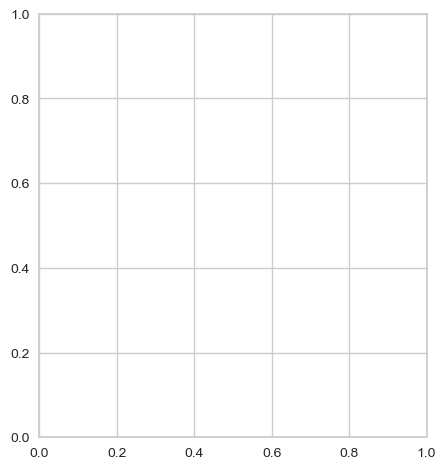

In [13]:
for cluster in range(2, 250):
    cls = MiniBatchKMeans(n_clusters=cluster, random_state=42)  # Você pode alterar o valor de random_state

    cls.fit(features)

    # Visualização 2D
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1)

    pca = PCA(n_components=2, random_state=0)
    reduced_features = pca.fit_transform(features.toarray())
    reduced_cluster_centers = pca.transform(cls.cluster_centers_)

    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cls.predict(features))
    ax.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:, 1], marker='o', s=150, edgecolor='k')

    for i, c in enumerate(reduced_cluster_centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    plt.title("Análise de cluster k = %d" % cluster)
    plt.xlabel('Dispersão em X')
    plt.ylabel('Dispersão em Y')

    # Visualização 3D
    ax = fig.add_subplot(1, 2, 2, projection="3d")

    pca = PCA(n_components=3, random_state=0)
    reduced_features = pca.fit_transform(features.toarray())
    reduced_cluster_centers = pca.transform(cls.cluster_centers_)

    ax.scatter3D(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], marker='o', s=150, edgecolor='k', c=cls.predict(features))

    plt.title("Análise de cluster k = %d" % cluster)
    plt.xlabel('Dispersão em X')
    plt.ylabel('Dispersão em Y')

    # Salva o arquivo de imagem 3D
    plt.savefig("imagens/grafico_cluster_k=%d" % cluster)
    plt.show()

In [11]:
# Defina qual cluster você deseja imprimir
cluster_to_print = 140  # Substitua pelo número do cluster desejado

# Crie uma instância do modelo K-Means para o cluster escolhido
cls = MiniBatchKMeans(n_clusters=cluster_to_print, random_state=42)
cls.fit(features)

# Encontre os índices dos pontos de dados que pertencem ao cluster escolhido
cluster_indices = [i for i, label in enumerate(cls.labels_) if label == cluster_to_print]

# Imprima os dados pertencentes ao cluster escolhido
for index in cluster_indices:
    print(features[index])

In [14]:
df.head(10)

,cod_item,desc,status,cod_grupo,grupo,cod_classe,classe,cod_classif,classif,material_servico,complex
0,449284,pecas acessorios armamento material aco tipo...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
1,447288,pecas acessorios armamento material aco tipo...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
2,236330,bucha placa punho material aco com rosca inter...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,15001.0,BUCHA PLACA PUNHO,MATERIAL,1.0
3,451952,pecas acessorios armamento material metal ti...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
4,448489,pecas acessorios armamento material aco tipo...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
5,227486,ejetor material aco carbono funcao liberar ca...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,13801.0,EJETOR,MATERIAL,1.0
6,449229,pecas acessorios armamento material aco tipo...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
7,446820,pecas acessorios armamento material aco tipo...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
8,446848,pecas acessorios armamento material aco tipo...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
9,451985,pecas acessorios armamento material aco tipo...,ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0
